In [1]:
# Imports
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

import uproot
import particle

# Imports from this project
sys.path.insert(0, "..")
from utils import paths
from utils.input_output import load_data_from_root, load_preprocessed_data, load_feature_properties
from utils.histograms import find_good_binning, get_hist, calc_pull
from utils.merge_pdfs import merge_pdfs

from hist_features_by_label import hist_feature_by_label


# Check if the SS classified data is correct

In [4]:
df = load_preprocessed_data(N_entries_max=1000000000, input_file=paths.ss_classified_data_file)

Entries in the data: 18027892
Entries to be loaded: 18027892


Load Batches:   0%|          | 0/19 [00:00<?, ?it/s]

In [5]:
df

,event_id,track_id,Tr_is_SS,B_is_strange,decay_id,B_ID,B_TRUEID,Tr_ORIG_FLAGS,input_file_id,Tr_diff_z,...,Tr_T_MinIPChi2,Tr_T_BPVIP,Tr_T_NbTrNonIso_sigtr,Tr_T_Best_PAIR_M_fromiso,Tr_T_Charge,Tr_T_PROBNNp,Tr_T_Best_PAIR_VCHI2,Tr_T_Best_PAIR_D,Tr_T_IP_trMother,Tr_ProbSS
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,1,511,531,5.0,1,143.740405,...,0.912249,0.034308,0.0,492.229248,1.0,0.000015,0.315618,0.020265,0.020265,0.600402
1,0,1,0,1,1,511,531,105.0,1,83.553896,...,0.004299,0.003569,0.0,333.950165,1.0,0.662021,19009.216797,2.812479,2.812479,0.000544
2,0,2,0,1,1,511,531,5.0,1,173.678805,...,1.008228,0.073464,0.0,679.630981,-1.0,0.079083,0.261954,0.037624,0.037624,0.640985
3,0,3,0,1,1,511,531,5.0,1,188.693102,...,2.167526,0.103467,0.0,494.291229,1.0,0.890212,1.613895,0.088192,0.088192,0.514494
4,0,4,0,1,1,511,531,5.0,1,188.693102,...,1.286842,0.149238,0.0,634.541504,-1.0,0.004377,1.328093,0.149002,0.149002,0.561569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18027887,412973,24,0,1,1,511,-531,-1.0,1,404.286587,...,0.039072,0.112458,0.0,470.882233,1.0,0.005892,0.005186,0.041104,0.041104,0.096378
18027888,412973,25,0,1,1,511,-531,5.0,1,36.596302,...,0.732217,0.024884,0.0,667.012573,1.0,0.055039,0.776193,0.022987,0.022987,0.815054
18027889,412973,26,0,1,1,511,-531,5.0,1,154.305905,...,6.624832,0.162057,0.0,1011.106262,-1.0,0.191209,1.467357,0.075229,0.075229,0.488337


In [6]:
df.columns

Index(['event_id', 'track_id', 'Tr_is_SS', 'B_is_strange', 'decay_id', 'B_ID',
       'B_TRUEID', 'Tr_ORIG_FLAGS', 'input_file_id', 'Tr_diff_z', 'Tr_p_proj',
       'Tr_diff_pt', 'Tr_diff_p', 'Tr_cos_diff_phi', 'Tr_diff_eta',
       'Tr_T_Sum_of_trackp', 'Tr_T_TRFITMATCHCHI2', 'Tr_T_Best_PAIR_DCHI2',
       'Tr_T_Ntr_incone', 'Tr_T_BPVIPCHI2', 'Tr_T_PROBNNk', 'Tr_T_VeloCharge',
       'Tr_T_IPCHI2_trMother', 'Tr_T_MinBDT_sigtr', 'Tr_T_THETA',
       'Tr_T_yfirst', 'Tr_T_PIDmu', 'Tr_T_Sum_of_trackpt',
       'Tr_T_NbNonIsoTr_ult', 'Tr_T_ACHI2DOCA', 'Tr_T_SumBDT_sigtr',
       'Tr_T_PIDK', 'Tr_T_PIDp', 'Tr_T_PROBNNmu', 'Tr_T_xfirst', 'Tr_T_TRTYPE',
       'Tr_T_Mother_VtxChi2', 'Tr_T_IP_trPUS', 'Tr_T_AALLSAMEBPV', 'Tr_T_y',
       'Tr_T_PROBNNpi', 'Tr_T_x', 'Tr_T_MinBDT_ult', 'Tr_T_SumBDT_ult',
       'Tr_T_ShareSamePVasSignal', 'Tr_T_MinIP', 'Tr_T_TrFIRSTHITZ',
       'Tr_T_TRCHI2DOF', 'Tr_T_TRGHOSTPROB', 'Tr_T_Cone_asym_P',
       'Tr_T_TRPCHI2', 'Tr_T_NbNonIsoTr_MinBDT_ult', 'Tr_T_TRF

In [9]:
df[["Tr_is_SS","Tr_ProbSS"]].head(15)

,Tr_is_SS,Tr_ProbSS
index,,
0,0,0.600402
1,0,0.000544
2,0,0.640985
3,0,0.514494
4,0,0.561569
5,0,0.517455
6,0,0.000366
7,0,0.386292
8,1,0.644972


In [12]:
df[["Tr_is_SS","Tr_ProbSS"]].sort_values(by="Tr_ProbSS")

,Tr_is_SS,Tr_ProbSS
index,,
16505689,0,7.575834e-11
11303607,0,8.685124e-11
13275763,0,8.805353e-11
9120652,0,9.051742e-11
5069329,0,9.831122e-11
...,...,...
4107350,1,9.974495e-01
16325955,1,9.974506e-01
9885015,1,9.977689e-01


# Check for Bd Bs separation based on the feature importance

In [2]:
df_data = load_preprocessed_data()

Entries in the data: 18027892
Entries to be loaded: 18027892.0


Load Batches:   0%|          | 0/19 [00:00<?, ?it/s]

In [12]:
feature_props = load_feature_properties()

In [13]:
fkey = "Tr_T_x"
fprops = feature_props[fkey]

lkey = "B_is_strange"
lprops = feature_props[lkey]

n_bins = 200
lower_quantile = 0.01
higher_quantile = 0.99

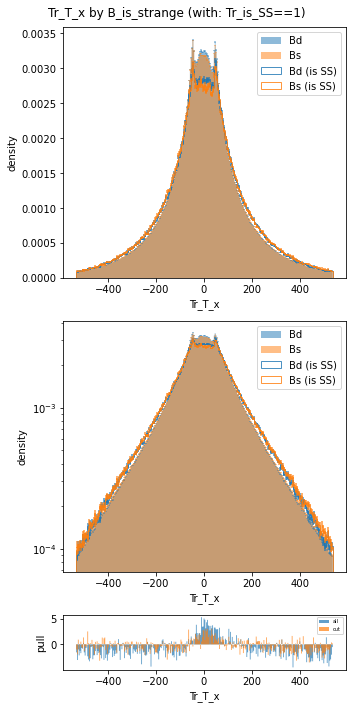

In [14]:
fig = hist_feature_by_label(df_data, fkey, fprops, lkey, lprops, higher_quantile=higher_quantile, lower_quantile=lower_quantile, add_cut=True, cut_query="Tr_is_SS==1", cut_label="is SS")

plt.show()

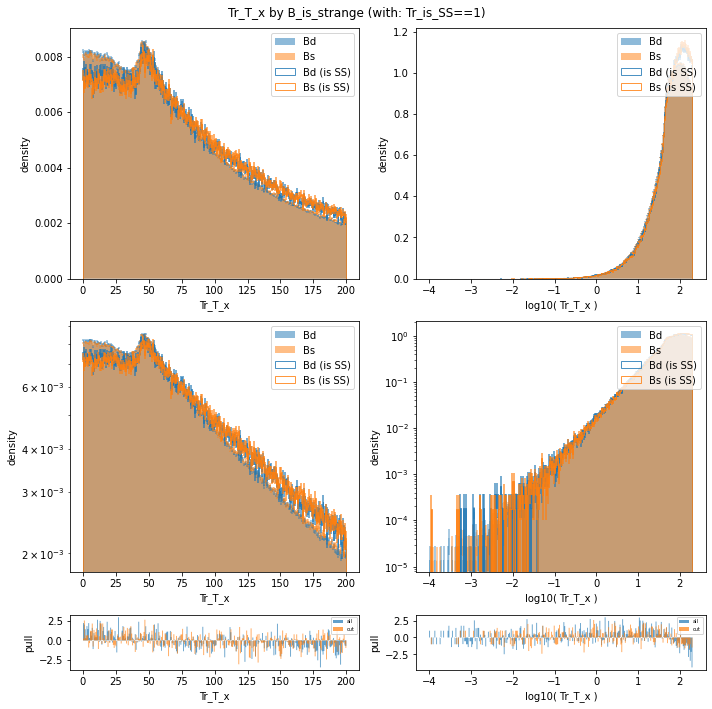

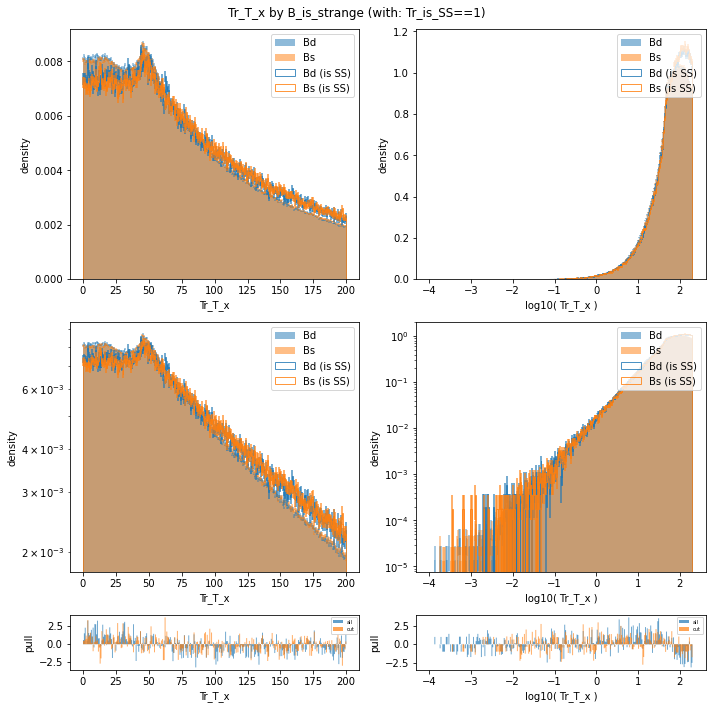

In [15]:

fkey = "Tr_T_x"
fprops = feature_props[fkey]

lkey = "B_is_strange"
lprops = feature_props[lkey]

n_bins = 200
lower_quantile = 0.01
higher_quantile = 0.99

fprops[f"quantile_{lower_quantile}"] = 0.0001
fprops[f"quantile_{higher_quantile}"] = 200

fig = hist_feature_by_label(df_data, fkey, fprops, lkey, lprops, higher_quantile=higher_quantile, lower_quantile=lower_quantile, add_cut=True, cut_query="Tr_is_SS==1", cut_label="is SS")

plt.show()

fig = hist_feature_by_label(df_data.eval("Tr_T_x=Tr_T_x*-1"), fkey, fprops, lkey, lprops, higher_quantile=higher_quantile, lower_quantile=lower_quantile, add_cut=True, cut_query="Tr_is_SS==1", cut_label="is SS")

plt.show()